In [1]:
from radpy.stellar import *
from radpy.datareadandformat import *
from radpy.plotting import plot_v2_fit
from radpy.LDfitting import initial_LDfit, run_LDfit
from radpy.config import vegapath, classicpath, pavopath
from radpy.UDfitting import initial_UDfit, run_udmcbs_fit, udfit_values

In [2]:
filenamec = "C:\\Users\\oxfor\\Research\\rsadpy\\radpy\\data\\ClassicData.csv"
filenamep = "C:\\Users\\oxfor\\Research\\rsadpy\\radpy\\data\\PAVOdata.csv"
filenamev = "C:\\Users\\oxfor\\Research\\rsadpy\\radpy\\data\\Vegadata.csv"

In [3]:
datav, num_brack_v = filename_extension(filenamev, 'V')
datac, num_brack_c = filename_extension(filenamec, 'C')
datap, num_brack_p = filename_extension(filenamep, 'P')

Number of brackets: 20
Number of brackets: 1
Number of brackets: 17


In [4]:
pavo_data = PavoData(datap)
vega_data = VegaData(datav)
classic_data = ClassicData(datac)

In [5]:
b, v2, dv2, wave, band, brack, inst = combined(pavo_data.make_df(), classic_data.make_df(), vega_data.make_df())
spf = b/wave

In [6]:
#Stellar parameters
p = 152.864
dp = 0.0494
f = 21.751
df = 0.585
logg = 4.5
dlogg = 0.1
m = 0.09
dm = 0.08
#distances("HD 219134", verbose = True)
D, dD = distances('HD 219134', verbose = True)

Found Gaia DR3: Gaia DR3 2009481748875806976
Source ID 2009481748875806976
Corrected parallax: 152.84
Distance: 6.54286 +/- 0.00212 [pc]


C:\Users\oxfor\anaconda3\lib\site-packages\zero_point\zpt.py:205: UserWarning: The apparent magnitude of one or more of the sources is outside the expected range (6-21 mag). 
                Outside this range, there is no further interpolation, thus the values at 6 or 21 are returned.
  warnings.warn(


In [7]:
star = StellarParams()
star.fbol = f
star.fbol_err = df
star.logg = logg
star.logg_err = dlogg
star.feh = m
star.feh_err = dm
star.dist = D
star.dist_err = dD
star.plx = p
star.plx_err = dp

In [8]:
print("Stellar parameters:")
print(star)

Stellar parameters:
fbol = 21.751 [10⁻⁸ erg/s/cm²]
fbol_err = 0.585 [10⁻⁸ erg/s/cm²]
logg = 4.5 [dex]
logg_err = 0.1 [dex]
feh = 0.09 [dex]
feh_err = 0.08 [dex]
plx = 152.864 [mas]
plx_err = 0.0494 [mas]
dist = 6.54286 [pc]
dist_err = 0.00212 [pc]
udthetai = None [mas]
udthetai_err = None [mas]
ldthetai = None [mas]
ldthetai_err = None [mas]
udtheta = None [mas]
udtheta_err = None [mas]
ldtheta = None [mas]
ldtheta_err = None [mas]
teff = None [K]
teff_err = None [K]
lum = None [L☉]
lum_err = None [L☉]
rad = None [R☉]
rad_err = None [R☉]
ldc_R = None [ ]
ldc_K = None [ ]
ldc_H = None [ ]
ldc_J = None [ ]


In [9]:
theta1, dtheta1, chisqr1 = initial_UDfit(spf, v2, dv2, 0.4, star, verbose = False)
#initial_UDfit(spf, v2, dv2, 0.4, star, verbose = False)


In [10]:
theta2, dtheta2, chisqr2 = initial_LDfit(spf, v2, dv2, star, 'R', verbose = True)
#initial_LDfit(spf, v2, dv2, star, 'R', verbose = True)

Effective temperature: 4963.232392396183 +/- 33.51205790769525 K
LDC for filter  R : 0.6672020537173402
Initial fit with lmfit:
[[Model]]
    Model(V2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 461
    # variables        = 1
    chi-square         = 578.043019
    reduced chi-square = 1.25661526
    Akaike info crit   = 106.301366
    Bayesian info crit = 110.434764
    R-squared          = -59.6853470
[[Variables]]
    theta:  1.11365607 +/- 0.00140433 (0.13%) (init = 1.03756)


In [11]:
print("Initial fitting results:")
print(star)

Initial fitting results:
fbol = 21.751 [10⁻⁸ erg/s/cm²]
fbol_err = 0.585 [10⁻⁸ erg/s/cm²]
logg = 4.5 [dex]
logg_err = 0.1 [dex]
feh = 0.09 [dex]
feh_err = 0.08 [dex]
plx = 152.864 [mas]
plx_err = 0.0494 [mas]
dist = 6.54286 [pc]
dist_err = 0.00212 [pc]
udthetai = 1.03756 [mas]
udthetai_err = 0.00128 [mas]
ldthetai = 1.11366 [mas]
ldthetai_err = 0.0014 [mas]
udtheta = None [mas]
udtheta_err = None [mas]
ldtheta = None [mas]
ldtheta_err = None [mas]
teff = 4963.23239 [K]
teff_err = 33.51206 [K]
lum = None [L☉]
lum_err = None [L☉]
rad = None [R☉]
rad_err = None [R☉]
ldc_R = None [ ]
ldc_K = None [ ]
ldc_H = None [ ]
ldc_J = None [ ]


In [12]:
results = run_udmcbs_fit(10, 10, datasets = [pavo_data, vega_data, classic_data], stellar_params = star)

In [13]:
udfit_values(spf, v2, dv2, results, stellar_params = star, verbose = True)

Uniform Disk Diameter after MC/BS: 1.0394 +/- 0.00349 mas
Chi-squared: 21.581282215653708
Chi-squared reduced: 0.04691583090359502
Temperature: 4958.8 +/- 34.4 K


In [14]:
print("Final fitting results:")
print(star)

Final fitting results:
fbol = 21.751 [10⁻⁸ erg/s/cm²]
fbol_err = 0.585 [10⁻⁸ erg/s/cm²]
logg = 4.5 [dex]
logg_err = 0.1 [dex]
feh = 0.09 [dex]
feh_err = 0.08 [dex]
plx = 152.864 [mas]
plx_err = 0.0494 [mas]
dist = 6.54286 [pc]
dist_err = 0.00212 [pc]
udthetai = 1.03756 [mas]
udthetai_err = 0.00128 [mas]
ldthetai = 1.11366 [mas]
ldthetai_err = 0.0014 [mas]
udtheta = 1.03941 [mas]
udtheta_err = 0.00349 [mas]
ldtheta = None [mas]
ldtheta_err = None [mas]
teff = 4958.81396 [K]
teff_err = 34.36474 [K]
lum = None [L☉]
lum_err = None [L☉]
rad = None [R☉]
rad_err = None [R☉]
ldc_R = None [ ]
ldc_K = None [ ]
ldc_H = None [ ]
ldc_J = None [ ]


In [15]:
thetaf, dthetaf, tf, dtf, ldcsf, chisf = run_LDfit(2, 2, ogdata = [spf, v2, dv2], datasets = [pavo_data, vega_data, classic_data], stellar_params = star, verbose = True)

Final Values after  8  iterations:
Limb-darkened Disk Diameter after MC/BS: 1.1118 +/- 0.00487 mas
Limb-darkening coefficient in R: 0.68402
Chi-squared for R band: 588.614
Reduced chi-squared for R band: 1.28
Limb-darkening coefficient in K: 0.32208
Chi-squared for K band: 1484.055
Reduced chi-squared for K band: 3.226
Temperature: 4794.6 +/- 33.9 K
Percent difference: 0.01 %
Percent difference: 0.01 %


In [16]:
print("Final fitting results:")
print(star)

Final fitting results:
fbol = 21.751 [10⁻⁸ erg/s/cm²]
fbol_err = 0.585 [10⁻⁸ erg/s/cm²]
logg = 4.5 [dex]
logg_err = 0.1 [dex]
feh = 0.09 [dex]
feh_err = 0.08 [dex]
plx = 152.864 [mas]
plx_err = 0.0494 [mas]
dist = 6.54286 [pc]
dist_err = 0.00212 [pc]
udthetai = 1.03756 [mas]
udthetai_err = 0.00128 [mas]
ldthetai = 1.11366 [mas]
ldthetai_err = 0.0014 [mas]
udtheta = 1.03941 [mas]
udtheta_err = 0.00349 [mas]
ldtheta = 1.11181 [mas]
ldtheta_err = 0.00487 [mas]
teff = 4794.63149 [K]
teff_err = 34.36474 [K]
lum = None [L☉]
lum_err = None [L☉]
rad = None [R☉]
rad_err = None [R☉]
ldc_R = 0.68402 [ ]
ldc_K = 0.32208 [ ]
ldc_H = None [ ]
ldc_J = None [ ]


In [17]:
calc_star_params(star, verbose = True)

Linear Radius:  0.783 +/- 0.003 [R_solar]
Luminosity:  0.291 +/- 0.008 [L_solar]
Effective temperature:  4794.639 +/- 33.905 [K]


In [18]:
print("Final stellar parameters:")
calc_star_params(star, verbose = True)
print(star)

Final stellar parameters:
Linear Radius:  0.783 +/- 0.003 [R_solar]
Luminosity:  0.291 +/- 0.008 [L_solar]
Effective temperature:  4794.639 +/- 33.905 [K]
fbol = 21.751 [10⁻⁸ erg/s/cm²]
fbol_err = 0.585 [10⁻⁸ erg/s/cm²]
logg = 4.5 [dex]
logg_err = 0.1 [dex]
feh = 0.09 [dex]
feh_err = 0.08 [dex]
plx = 152.864 [mas]
plx_err = 0.0494 [mas]
dist = 6.54286 [pc]
dist_err = 0.00212 [pc]
udthetai = 1.03756 [mas]
udthetai_err = 0.00128 [mas]
ldthetai = 1.11366 [mas]
ldthetai_err = 0.0014 [mas]
udtheta = 1.03941 [mas]
udtheta_err = 0.00349 [mas]
ldtheta = 1.11181 [mas]
ldtheta_err = 0.00487 [mas]
teff = 4794.63921 [K]
teff_err = 33.90543 [K]
lum = 0.29068 [L☉]
lum_err = 0.00782 [L☉]
rad = 0.78347 [R☉]
rad_err = 0.00344 [R☉]
ldc_R = 0.68402 [ ]
ldc_K = 0.32208 [ ]
ldc_H = None [ ]
ldc_J = None [ ]


In [19]:
data_dict = {'pavo':pavo_data, 'vega':vega_data, 'classic':classic_data}

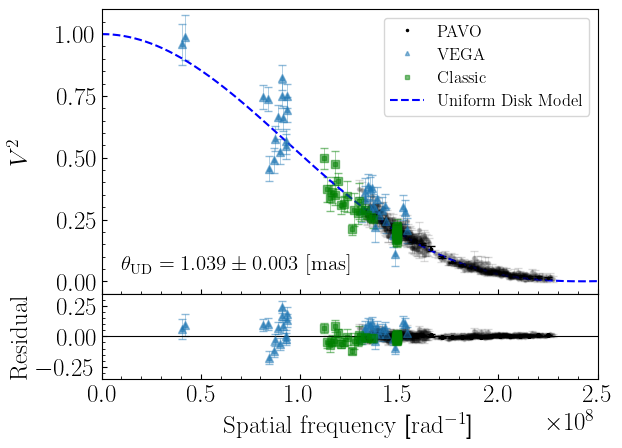

(<Figure size 640x480 with 2 Axes>,
 (<Axes: ylabel='$V^2$'>,
  <Axes: xlabel='$\\rm Spatial$ $\\rm frequency$ [$\\rm rad^{-1}$]', ylabel='$\\rm Residual$'>))

In [20]:
plot_v2_fit(
    data_dict=data_dict,
    star=star,          # Your Star instance with theta, ldcR, etc., and .V2 method
    line_spf=np.linspace(0.00001, 2.5e8, 1000),
    set_axis = [0, 2.5e8, -0.05,1.1],
    ldc_band='ldc_R',        # or 'ldcR', 'ldcH', etc.
    datasets_to_plot=['pavo', 'vega', 'classic'],
    plot_udmodel = True,
    to_bin = ['pavo'],
    eq_text=True,
    show = True
)